In [2]:
import pandas as pd
import numpy as np
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt

from plotnine import *
from collections import OrderedDict

DATA_FOLDER = 'data/'

In [3]:
datasets = []
for x in range(2002, 2017):
    frame = pd.read_csv(os.path.join(DATA_FOLDER, f'regions_pl_uro_{x}_00_2p.csv'))
    frame = frame.drop(columns=['Unnamed: 0'])
    frame['year'] = pd.Series(data=[x] * len(frame))
    datasets.append(frame)
dataframe = pd.concat(datasets)
dataframe.reset_index(level=[0], inplace=True)
dataframe = dataframe.drop(columns=['index'])
dataframe = dataframe.replace({'-': 0})
dataframe['region'] = dataframe['region'].str.lower().str.strip()
dataframe

region    total        1        2       3       4      5  \
0           dolnośląskie  24588.0  12684.0   7543.0  2620.0   904.0  418.0   
1     kujawsko-pomorskie  20238.0  10074.0   6132.0  2253.0   887.0  453.0   
2              lubelskie  20908.0   9548.0   6437.0  2691.0  1134.0  512.0   
3               lubuskie   9486.0   4730.0   2926.0  1016.0   427.0  193.0   
4                łódzkie  22258.0  11419.0   7113.0  2325.0   787.0  316.0   
5            małopolskie  32451.0  14710.0  10254.0  4194.0  1723.0  773.0   
6            mazowieckie  46627.0  23028.0  14821.0  5201.0  1979.0  848.0   
7               opolskie   8506.0   3938.0   2704.0  1043.0   459.0  178.0   
8           podkarpackie  21414.0   9488.0   6592.0  2856.0  1239.0  616.0   
9              podlaskie  11318.0   5032.0   3526.0  1528.0   646.0  290.0   
10             pomorskie  22402.0  10758.0   6794.0  2635.0  1107.0  514.0   
11               śląskie  39557.0  20291.0  12363.0  4162.0  1530.0  658.0   
12        świętokrzyskie  11837.0   5746.0   3683.0  1380.0   557.0  249.0   
13   warmińsko-mazurskie  14894.0   7015.0   4430.0  1764.0   815.0  406.0   
14         wielkopolskie  33253.0  16460.0  10358.0  3781.0  1384.0  605.0   
15    zachodniopomorskie  15789.0   7971.0   4674.0  1693.0   698.0  364.0   
16          dolnośląskie  24103.0  12991.0   7078.0  2408.0   878.0  343.0   
17    kujawsko-pomorskie  20226.0  10278.0   6159.0  2153.0   841.0  404.0   
18             lubelskie  21346.0  10218.0   6640.0  2483.0  1050.0  472.0   
19              lubuskie   9327.0   4758.0   2839.0   999.0   352.0  181.0   
20               łódzkie  21889.0  11575.0   6917.0  2082.0   776.0  288.0   
21           małopolskie  32018.0  14945.0  10027.0  4007.0  1529.0  751.0   
22           mazowieckie  46791.0  24006.0  14659.0  4883.0  1703.0  767.0   
23              opolskie   8186.0   3891.0   2653.0   936.0   364.0  164.0   
24          podkarpackie  20599.0   9311.0   6507.0  2651.0  1128.0  504.0   
25             podlaskie  10848.0   4980.0   3391.0  1358.0   588.0  263.0   
26             pomorskie  22511.0  11168.0   6765.0  2504.0  1047.0  468.0   
27               śląskie  39366.0  20695.0  12271.0  3943.0  1332.0  582.0   
28        świętokrzyskie  11609.0   5862.0   3638.0  1251.0   461.0  185.0   
29   warmińsko-mazurskie  14570.0   7196.0   4281.0  1691.0   642.0  351.0   
..                   ...      ...      ...      ...     ...     ...    ...   
210            lubelskie  19715.0   9187.0   7294.0  2211.0   645.0  212.0   
211             lubuskie   9420.0   4178.0   3594.0   985.0   256.0   91.0   
212              łódzkie  22113.0  10863.0   8297.0  1988.0   480.0  144.0   
213          małopolskie  34721.0  15817.0  13092.0  4284.0  1017.0  281.0   
214          mazowieckie  57456.0  27121.0  21698.0  5895.0  1389.0  426.0   
215             opolskie   8289.0   3840.0   3254.0   855.0   206.0   71.0   
216         podkarpackie  19566.0   9205.0   7172.0  2284.0   586.0  183.0   
217            podlaskie  10825.0   5078.0   4023.0  1220.0   313.0  107.0   
218            pomorskie  24596.0  11361.0   9111.0  2850.0   771.0  283.0   
219              śląskie  41611.0  20004.0  15779.0  4160.0  1056.0  335.0   
220       świętokrzyskie  10579.0   5129.0   4054.0   998.0   271.0   72.0   
221  warmińsko-mazurskie  13121.0   6112.0   4834.0  1442.0   439.0  152.0   
222        wielkopolskie  36760.0  17308.0  14210.0  3784.0   941.0  292.0   
223   zachodniopomorskie  15088.0   7197.0   5555.0  1538.0   435.0  168.0   
224         dolnośląskie  27452.0  13378.0  10332.0  2653.0   711.0  210.0   
225   kujawsko-pomorskie  19840.0   9092.0   7539.0  2203.0   628.0  229.0   
226            lubelskie  19666.0   8823.0   7609.0  2305.0   576.0  219.0   
227             lubuskie   9734.0   4327.0   3793.0  1074.0   280.0  114.0   
228              łódzkie  22794.0  11030.0   8759.0  2230.0   495.0  157.0   
229          małopolskie  36331.0  16124

# Pearson correlation

In [4]:
from scipy.stats import pearsonr
from pprint import pprint

number_kids_columns_names = list(map(str, range(1, 11)))
number_kids_columns_names[-1] = '10 i dalsze'
print(number_kids_columns_names)
for num in number_kids_columns_names:
    dataframe[num] = dataframe[num].astype(np.int)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10 i dalsze']


## Kid vs kids in years

## For each region

In [5]:
grouped = dataframe.groupby(['region'])
all_data_frames = []
for group in grouped.groups:
    this_region = grouped.get_group(group).groupby('year').sum()
    correlation_data = OrderedDict({
        'number of kids': [],
        'correlation': []
    })
    for num in number_kids_columns_names:
        correlation_data['number of kids'].append(num)
        correlation_data['correlation'].append(pearsonr(this_region[number_kids_columns_names[0]], this_region[num])[0])
    result = pd.DataFrame(data=correlation_data)
    all_data_frames.append((
        group, result
    ))
for reg, data in all_data_frames:
    print('='* 30)
    print(reg)
    pprint(data)

dolnośląskie
  number of kids  correlation
0              1     1.000000
1              2     0.467298
2              3     0.339927
3              4     0.132310
4              5    -0.144790
5              6    -0.056524
6              7    -0.174568
7              8     0.064005
8              9     0.044500
9    10 i dalsze     0.217669
kujawsko-pomorskie
  number of kids  correlation
0              1     1.000000
1              2     0.263187
2              3     0.707911
3              4     0.369396
4              5     0.173713
5              6     0.431267
6              7     0.270649
7              8     0.268835
8              9     0.523098
9    10 i dalsze     0.493335
lubelskie
  number of kids  correlation
0              1     1.000000
1              2     0.290171
2              3     0.450298
3              4     0.292370
4              5     0.205619
5              6     0.194899
6              7     0.180009
7              8     0.243616
8              9     0.17492

In [15]:
dataframe['więcej'] = dataframe['2'] +  dataframe['3'] + dataframe['4'] + dataframe['5'] + dataframe['6'] + dataframe['7'] + dataframe['8'] + dataframe['9']  + dataframe['10 i dalsze']
dataframe[['region', '1', 'więcej']].groupby('region').corr()



1    więcej
region                                        
dolnośląskie        1       1.000000  0.529030
                    więcej  0.529030  1.000000
kujawsko-pomorskie  1       1.000000  0.590474
                    więcej  0.590474  1.000000
lubelskie           1       1.000000  0.686587
                    więcej  0.686587  1.000000
lubuskie            1       1.000000  0.442002
                    więcej  0.442002  1.000000
mazowieckie         1       1.000000  0.736414
                    więcej  0.736414  1.000000
małopolskie         1       1.000000  0.674281
                    więcej  0.674281  1.000000
opolskie            1       1.000000  0.279349
                    więcej  0.279349  1.000000
podkarpackie        1       1.000000  0.418336
                    więcej  0.418336  1.000000
podlaskie           1       1.000000  0.223125
                    więcej  0.223125  1.000000
pomorskie           1       1.000000  0.592962
                    więcej  0.592962  1.000000
warmińsko-mazurskie 1       1.000000  0.716703
                    więcej  0.716703  1.000000
wielkopolskie       1       1.000000  0.557006
                    więcej  0.557006  1.000000
zachodniopomorskie  1       1.000000  0.431344
                    więcej  0.431344  1.000000
łódzkie             1       1.000000  0.617076
                    więcej  0.617076  1.000000
śląskie             1       1.000000  0.386564
                    więcej  0.386564  1.000000
świętokrzyskie      1       1.000000  0.746850
                    więcej  0.746850  1.000000

## For all regions

In [8]:
correlation_data = OrderedDict({
    'number of kids': [],
    'correlation': []
})
grouped = dataframe.groupby('year').sum()
for num in number_kids_columns_names:
    correlation_data['number of kids'].append(num)
    correlation_data['correlation'].append(pearsonr(grouped[number_kids_columns_names[0]], grouped[num])[0])
result = pd.DataFrame(data=correlation_data)
result

number of kids  correlation
0              1     1.000000
1              2     0.436132
2              3     0.267070
3              4    -0.067295
4              5    -0.146699
5              6    -0.120186
6              7    -0.138569
7              8    -0.104530
8              9    -0.100476
9    10 i dalsze    -0.035654

# Box plots

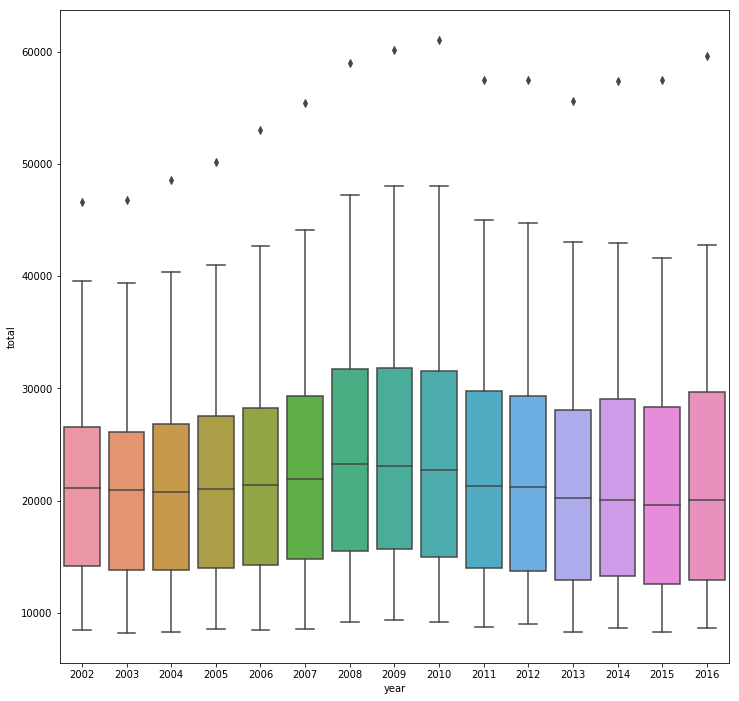

In [9]:
plt.figure(figsize=(12, 12))

sns.boxplot(x=dataframe['year'], y=dataframe['total'])

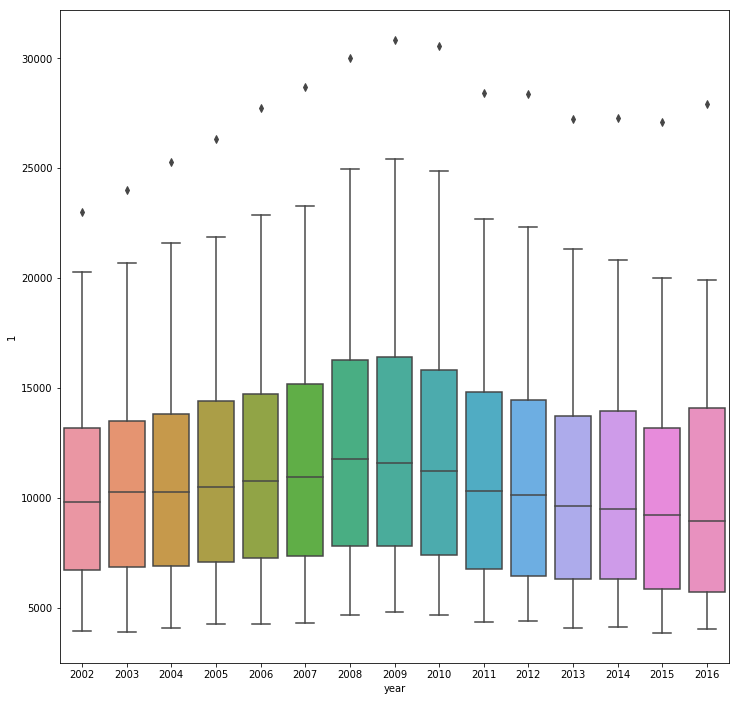

In [10]:
plt.figure(figsize=(12, 12))

sns.boxplot(x=dataframe['year'], y=dataframe['1'])

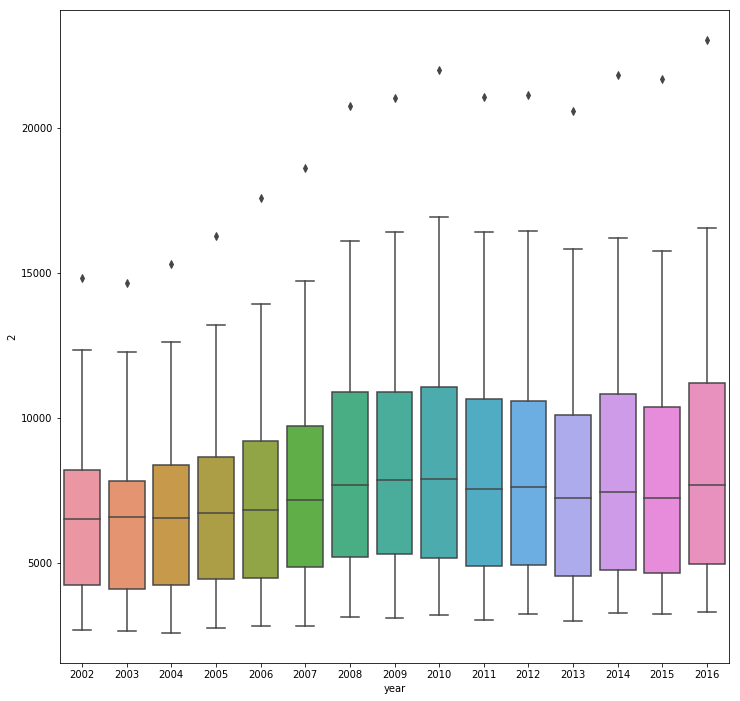

In [11]:
plt.figure(figsize=(12, 12))

sns.boxplot(x=dataframe['year'], y=dataframe['2'])

/home/kacper/miniconda3/lib/python3.6/site-packages/plotnine/utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
/home/kacper/miniconda3/lib/python3.6/site-packages/pandas/core/generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/home/kacper/miniconda3/lib/python3.6/site-packages/pandas/core/generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


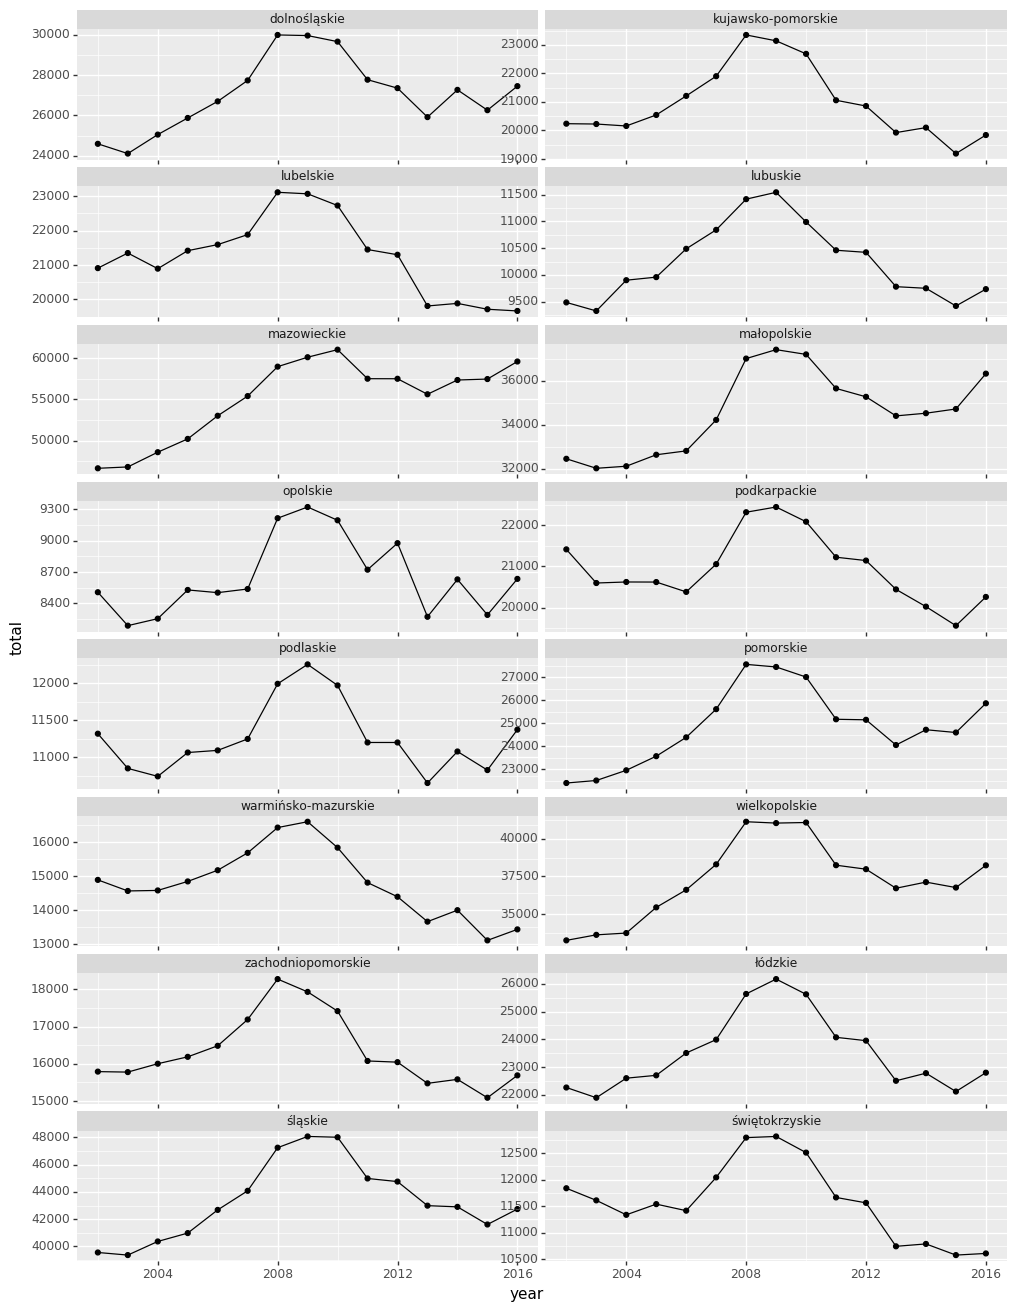

<ggplot: (-9223363284771709019)>

In [12]:
import plotnine
plotnine.options.figure_size=(12, 16)
(ggplot(aes(x='year', y='total'), data=dataframe) 
          + geom_line() 
          + geom_point()
          + facet_wrap('~region', ncol=2, scales='free'))

/home/kacper/miniconda3/lib/python3.6/site-packages/plotnine/utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
/home/kacper/miniconda3/lib/python3.6/site-packages/pandas/core/generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/home/kacper/miniconda3/lib/python3.6/site-packages/pandas/core/generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


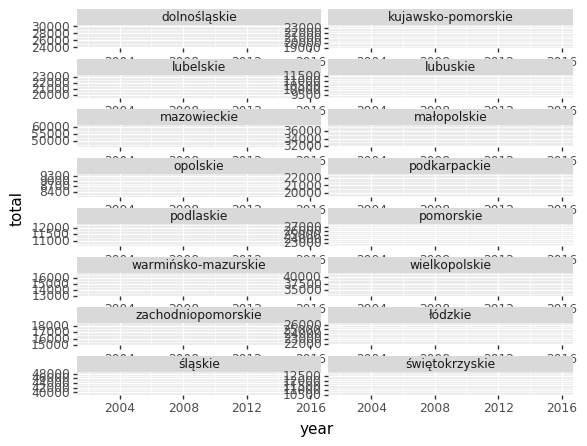

<ggplot: (8764852321249)>

In [18]:
(ggplot(aes(x='year', y='total'), data=dataframe) 
          + facet_wrap('~region', ncol=2, scales='free'))

[Text(0,0,'dolnośląskie'),
 Text(0,0,'kujawsko-pomorskie'),
 Text(0,0,'lubelskie'),
 Text(0,0,'lubuskie'),
 Text(0,0,'łódzkie'),
 Text(0,0,'małopolskie'),
 Text(0,0,'mazowieckie'),
 Text(0,0,'opolskie'),
 Text(0,0,'podkarpackie'),
 Text(0,0,'podlaskie'),
 Text(0,0,'pomorskie'),
 Text(0,0,'śląskie'),
 Text(0,0,'świętokrzyskie'),
 Text(0,0,'warmińsko-mazurskie'),
 Text(0,0,'wielkopolskie'),
 Text(0,0,'zachodniopomorskie')]

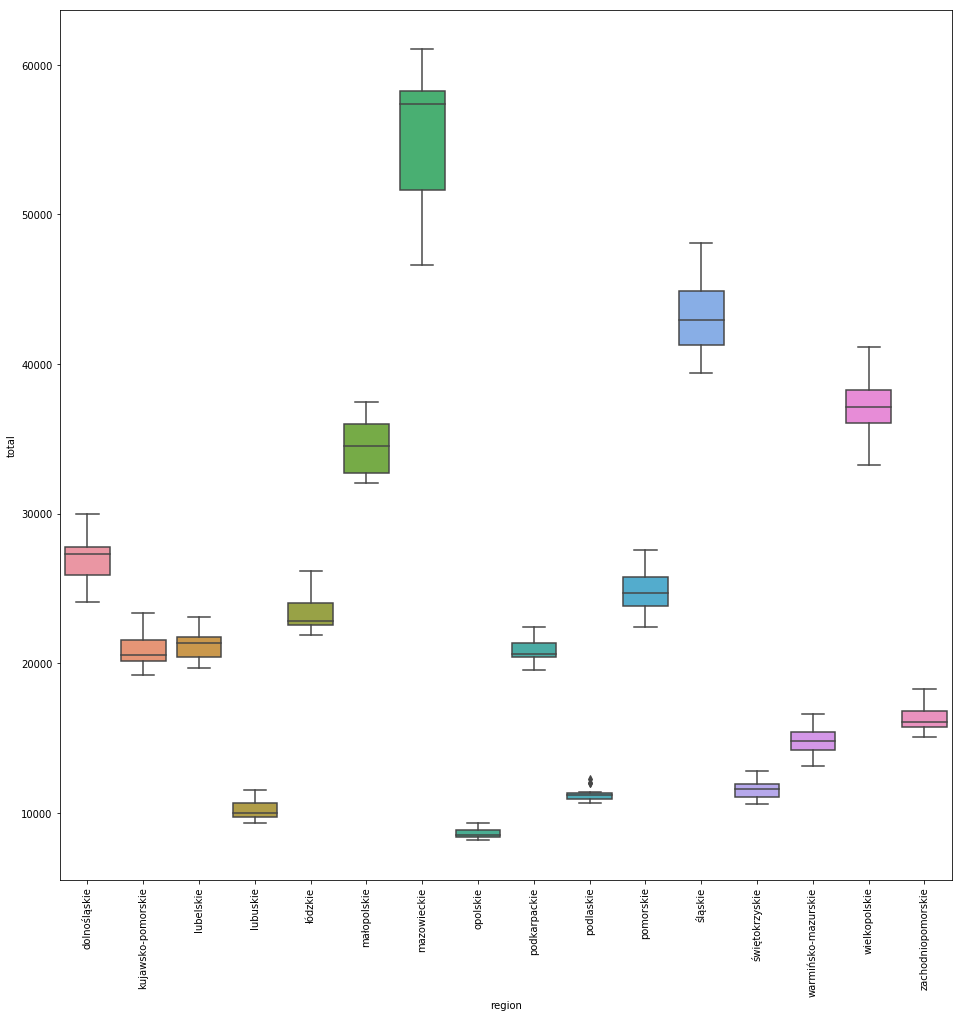

In [13]:
plt.figure(figsize=(16, 16))
g = sns.boxplot(x=dataframe['region'], y=dataframe['total'])
g.set_xticklabels(labels=dataframe['region'].unique(), rotation=90)